In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import re

import seaborn

%matplotlib inline
plt.style.use('ggplot')

mpl.rcParams['figure.figsize'] = (12, 12)

In [2]:
#for fn in os.listdir('./data/kerneltestdata/uncleandata'):
#    with open('./data/kerneltestdata/uncleandata/'+fn, 'r') as fin:
#        data = fin.read().splitlines(True)
#    with open('./data/kerneltestdata/'+fn, 'w') as fout:
#        fout.writelines(data[1:])

In [3]:
bl = pd.read_csv('./data/kerneltestdata/bl2partv3.csv', sep = ',')
c128 = pd.read_csv('./data/kerneltestdata/sync128result.csv', sep = ',')
c256 = pd.read_csv('./data/kerneltestdata/sync256result.csv', sep = ',')
c384 = pd.read_csv('./data/kerneltestdata/sync384result.csv', sep = ',')
c512 = pd.read_csv('./data/kerneltestdata/sync512result.csv', sep = ',')
c768 = pd.read_csv('./data/kerneltestdata/sync768result.csv', sep = ',')
c896 = pd.read_csv('./data/kerneltestdata/result896.csv', sep = ',')
c1024 = pd.read_csv('./data/kerneltestdata/sync1024result.csv', sep = ',')

p1c128 = pd.read_csv('./data/kerneltestdata/1psync128result.csv', sep = ',')
p1c256 = pd.read_csv('./data/kerneltestdata/1psync256result.csv', sep = ',')
p1c384 = pd.read_csv('./data/kerneltestdata/1psync384result.csv', sep = ',')
p1c512 = pd.read_csv('./data/kerneltestdata/1psync512result.csv', sep = ',')
p1c768 = pd.read_csv('./data/kerneltestdata/1psync768result.csv', sep = ',')
p1c896 = pd.read_csv('./data/kerneltestdata/1psync896result.csv', sep = ',')
p1c1024 = pd.read_csv('./data/kerneltestdata/1psync1024result.csv', sep = ',')

nos128 = pd.read_csv('./data/kerneltestdata/nosync128result.csv', sep = ',')
nos256 = pd.read_csv('./data/kerneltestdata/nosync256result.csv', sep = ',')
nos384 = pd.read_csv('./data/kerneltestdata/nosync384result.csv', sep = ',')
nos512 = pd.read_csv('./data/kerneltestdata/nosync512result.csv', sep = ',')
nos768 = pd.read_csv('./data/kerneltestdata/nosync768result.csv', sep = ',')
nos896 = pd.read_csv('./data/kerneltestdata/nosync896result.csv', sep = ',')
nos1024 = pd.read_csv('./data/kerneltestdata/nosync1024result.csv', sep = ',')

ss128 = pd.read_csv('./data/kerneltestdata/single128result.csv', sep = ',')
ss256 = pd.read_csv('./data/kerneltestdata/single256result.csv', sep = ',')
ss384 = pd.read_csv('./data/kerneltestdata/single384result.csv', sep = ',')
ss512 = pd.read_csv('./data/kerneltestdata/single512result.csv', sep = ',')
ss768 = pd.read_csv('./data/kerneltestdata/single768result.csv', sep = ',')
ss896 = pd.read_csv('./data/kerneltestdata/single896result.csv', sep = ',')
ss1024 = pd.read_csv('./data/kerneltestdata/single1024result.csv', sep = ',')

In [4]:
frames1 = [c128,c256,c384,c512,c768,c896,c1024]
frames2 = [p1c128,p1c256,p1c384,p1c512,p1c768,p1c896,p1c1024]
frames3 = [nos128,nos256,nos384,nos512,nos768,nos896,nos1024]
frames4 = [ss128,ss256,ss384,ss512,ss768,ss896,ss1024]
dfsync = pd.concat(frames1, ignore_index=True)
dfp1 = pd.concat(frames2, ignore_index=True)
dfnosync = pd.concat(frames3, ignore_index=True)
dfsingle = pd.concat(frames4, ignore_index=True)
dfsync.columns = dfsync.columns.str.strip()
dfnosync.columns = dfnosync.columns.str.strip()
dfp1.columns = dfp1.columns.str.strip()
dfsingle.columns = dfsingle.columns.str.strip()

In [39]:
#dfsync[dfsync['#size']==1024]
#dfsingle[dfsingle['#size']==1024]


#dfp1.head()


,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime,avgchunktime,type
70,1024,2147.484,0.364,19.913,19.914,131072,25165824,8388608,384,128,partition 1,9.530848,7.548160,2.832704,0.024820,single stream
71,1024,2147.484,0.364,19.913,19.914,131072,25165824,8388608,384,128,partition 2,9.539200,7.562016,2.812576,0.024842,single stream
72,1024,2147.484,0.392,19.977,19.978,131072,25165824,8388608,384,128,partition 1,9.591328,7.546688,2.837984,0.024977,single stream
73,1024,2147.484,0.392,19.977,19.978,131072,25165824,8388608,384,128,partition 2,9.600160,7.562528,2.815776,0.025000,single stream
74,1024,2147.484,0.372,19.954,19.955,131072,25165824,8388608,384,128,partition 1,9.563808,7.557984,2.830784,0.024906,single stream
75,1024,2147.484,0.372,19.954,19.955,131072,25165824,8388608,384,128,partition 2,9.572416,7.560512,2.821888,0.024928,single stream
76,1024,2147.484,0.362,20.047,20.048,131072,25165824,8388608,384,128,partition 1,9.672128,7.541472,2.832704,0.025188,single stream
77,1024,2147.484,0.362,20.047,20.048,131072,25165824,8388608,384,128,partition 2,9.680544,7.557536,2.810304,0.025210,single stream
78,1024,2147.484,0.354,19.931,19.932,131072,25165824,8388608,384,128,partition 1,9.541824,7.558784,2.829824,0.024848,single stream
79,1024,2147.484,0.354,19.931,19.932,131072,25165824,8388608,384,128,partition 2,9.550240,7.562624,2.819616,0.024870,single stream


In [6]:
dfsync['avgchunktime']=dfsync.HtDtime/dfsync['no_chunksHtD']
dfnosync['avgchunktime']=dfnosync.HtDtime/dfnosync['no_chunksHtD']
dfsingle['avgchunktime']=dfsingle.HtDtime/dfsingle['no_chunksHtD']
dfp1['avgchunktime']=dfp1.HtDtime/dfp1['no_chunksHtD']
dfsync['type']='synchronized streams'
dfnosync['type']='not synchronized streams'
dfsingle['type']='single stream'
dfp1['type']='single partition synched stream'

In [7]:
tempframes = [dfsync,dfnosync,dfp1,dfsingle]
dftemp=pd.concat(tempframes,ignore_index=True)
dftemp2 = dftemp.loc[dftemp['Kernel']=='partition 2']
dftemp2=dftemp2.append(dfp1)

In [29]:
dftemp2[dftemp2['#size']==1024]

,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime,avgchunktime,type
71,1024,2147.484,0.395,25.785,25.797,131072,25165824,8388608,384,128,partition 2,14.279168,7.549632,3.968544,0.037185,synchronized streams
73,1024,2147.484,0.412,25.804,25.817,131072,25165824,8388608,384,128,partition 2,14.278208,7.549152,3.989248,0.037183,synchronized streams
75,1024,2147.484,0.618,23.881,23.893,131072,25165824,8388608,384,128,partition 2,12.974400,7.555232,3.363584,0.033787,synchronized streams
77,1024,2147.484,0.615,23.829,23.842,131072,25165824,8388608,384,128,partition 2,12.979008,7.561696,3.300896,0.033800,synchronized streams
79,1024,2147.484,0.411,25.068,25.080,131072,25165824,8388608,384,128,partition 2,14.268672,7.546720,3.265088,0.037158,synchronized streams
391,1024,2147.484,0.430,19.929,19.972,524288,25165824,8388608,96,32,partition 2,9.677024,7.557120,2.737856,0.100802,synchronized streams
393,1024,2147.484,0.379,19.880,19.924,524288,25165824,8388608,96,32,partition 2,9.619840,7.565312,2.738496,0.100207,synchronized streams
395,1024,2147.484,0.445,19.987,20.031,524288,25165824,8388608,96,32,partition 2,9.714464,7.568640,2.748288,0.101192,synchronized streams
397,1024,2147.484,0.477,20.110,20.154,524288,25165824,8388608,96,32,partition 2,9.869856,7.560032,2.723744,0.102811,synchronized streams
399,1024,2147.484,0.426,20.197,20.242,524288,25165824,8388608,96,32,partition 2,9.931680,7.564736,2.745568,0.103455,synchronized streams


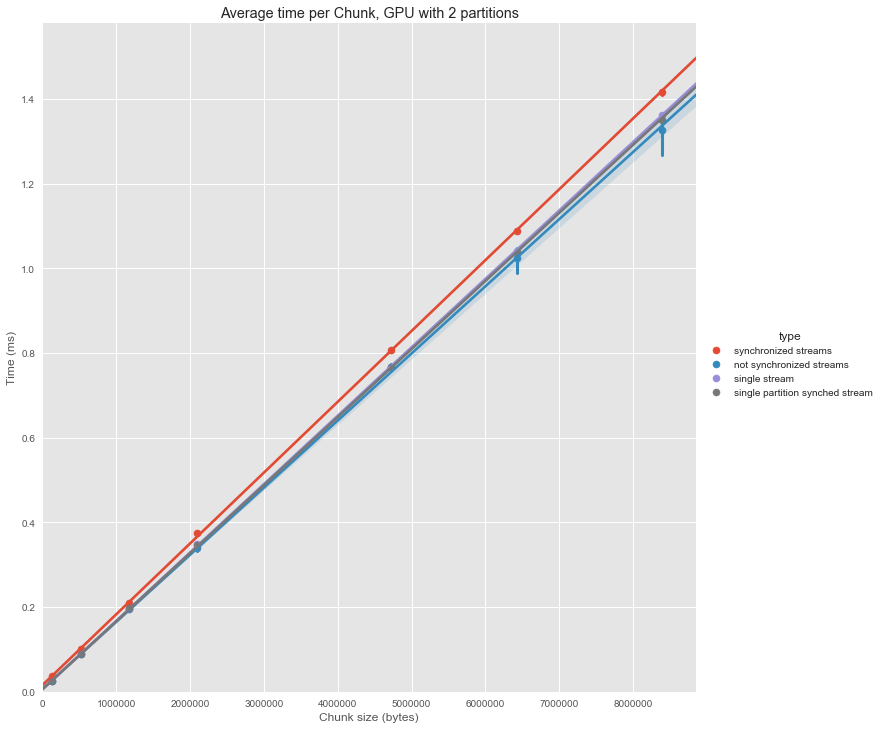

In [9]:
p=seaborn.lmplot(y='avgchunktime', x='chunksize',order=1,hue='type',data=dftemp2,size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)')
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions')
p.set(ylim=(0, None),xlim=(0,None))

In [28]:
syncfit = dfsync.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(syncfit['chunksize'],syncfit['avgchunktime'],1)
fsync=np.poly1d(r)
rco = np.corrcoef(syncfit['chunksize'],syncfit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2
t = r[0]*2097152+r[1]
print t,t*96
#syncfit[(syncfit['#size']==2048)]

[  1.67339650e-07   1.51962568e-02] 0.999256759421
0.366132938079 35.1487620556


In [26]:
fit = dfsingle.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
fsingle=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2,fsingle

[  1.61624378e-07   5.26840541e-03] 0.999365275792  
1.616e-07 x + 0.005268


In [27]:
fit = dfp1.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
f1p = np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2

[  1.60780941e-07   4.54775632e-03] 0.999781755785


In [13]:
result = sm.OLS(dftemp2['chunksize'],dftemp2['avgchunktime']).fit()
#result.summary()

In [14]:
dftemp3=dftemp2[dftemp2['chunksize']<1100000]

In [15]:
meanandstd = pd.DataFrame()
for f in tempframes:
    for cs in f.chunksize.unique():
        t = np.mean(f[f['chunksize']==cs])


In [16]:
avg128=np.mean(dftemp[dftemp['chunksize']==131072])
stderr128=np.std(dftemp[dftemp['chunksize']==131072])
var128=np.var(dftemp[dftemp['chunksize']==131072])

print avg128['avgchunktime']
print stderr128['avgchunktime']
print var128['avgchunktime']

0.0281105605479
0.0105892390293
0.00011213198322


In [17]:
avg1024=np.mean(dftemp[dftemp['chunksize']==8388608])
stderr1024=np.std(dftemp[dftemp['chunksize']==8388608])
var1024=np.var(dftemp[dftemp['chunksize']==8388608])


print avg1024['avgchunktime']
print stderr1024['avgchunktime']
print var1024['avgchunktime']



1.34078583
0.0978348577644
0.00957165939379


Model
-----

In [172]:
#if P1 matrix is larger than p2
def memtransfersync(m,n,k,c):
    t1 = m*f1p(c)+(n)*fsync(c)
    t2 = m*f1p(c)+n*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransfersyncreturn(m,n,k,c):
    t1 = m*f1p(c)+(n)*fsync(c)
    t2 = n*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransferstream(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)+k*fsingle(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

In [175]:
mtest512 = pd.read_csv('./data/kerneltestdata/modeltest512_1024.csv', sep = ',')
mtest620 = pd.read_csv('./data/kerneltestdata/modeltest620_1860.csv', sep = ',')
mtest920 = pd.read_csv('./data/kerneltestdata/modeltest960_2880.csv', sep = ',')
mtest = pd.concat([mtest512,mtest620,mtest920])
mtest.columns = mtest.columns.str.strip()
mtestk1 = mtest[mtest['Kernel']=='partition 1']
mtestk1 = mtestk1[['chunksize','HtDtime']]
mtest620.head()






,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,1860,12869.712,0.710,79.146,80.552,3075200,83030400,27676800,54,18,partition 1,25.191711,46.633759,5.915328
1,1860,12869.712,0.710,79.146,80.552,3075200,83030400,27676800,54,18,partition 2,28.241695,46.641441,5.668704
2,1860,12869.712,0.487,79.388,80.796,3075200,83030400,27676800,54,18,partition 1,25.475584,46.645504,5.858592
3,1860,12869.712,0.487,79.388,80.796,3075200,83030400,27676800,54,18,partition 2,28.522848,46.625599,5.647936
4,1860,12869.712,0.482,79.268,80.671,3075200,83030400,27676800,54,18,partition 1,25.331680,46.615070,5.918336


(7.2133547333146106, 8.0309117528860465)
(17.427962370229153, 19.478341341148205)


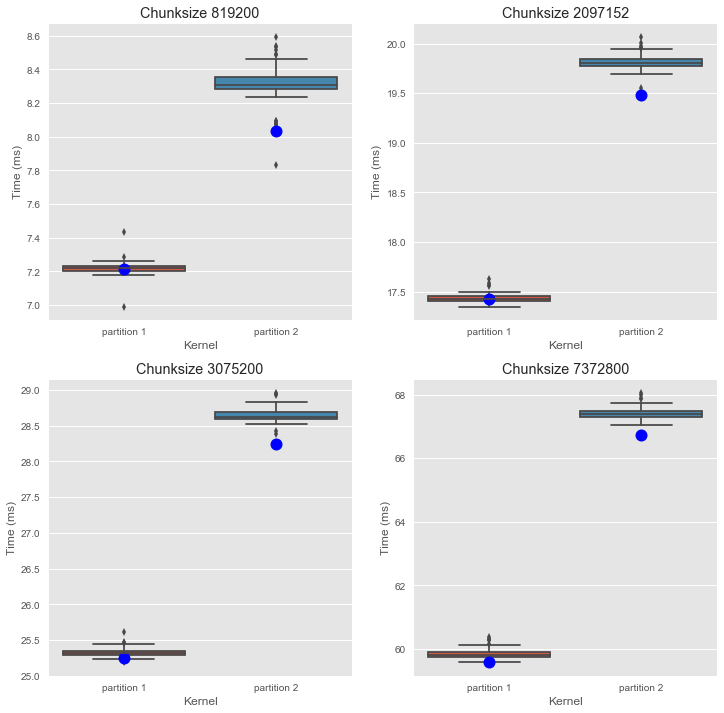

In [191]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(6,42,6,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1536.csv', sep = ',')
h = memtransfersync(6,42,6,2097152)
print h
mtest.columns = mtest.columns.str.strip()

mt=mtest
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


h = memtransfersync(6,42,6,3075200)


mt = mtest #[mtest['Kernel']=='partition 1']
h = memtransfersync(6,42,6,3075200)
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersync(6,42,6,7372800)

#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')
plt.title(title)

(1.7312424072490324, 1.7312424072490324)
(4.2471765993919242, 4.2471765993919242)


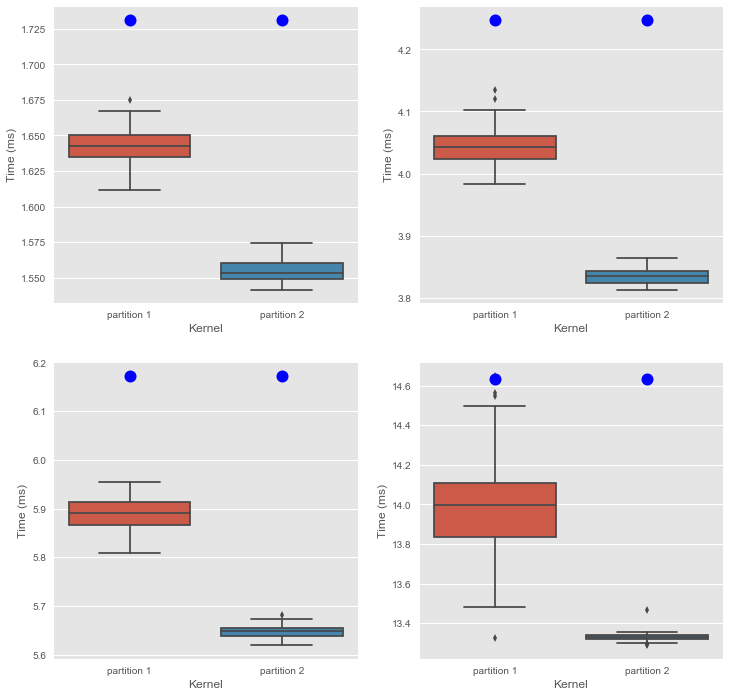

In [192]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncreturn(6,6,6,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1536.csv', sep = ',')
h = memtransfersyncreturn(6,6,6,2097152)
print h
mtest.columns = mtest.columns.str.strip()

mt=mtest
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')


plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


h = memtransfersyncreturn(6,6,6,3075200)


mt = mtest #[mtest['Kernel']=='partition 1']
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')



plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersyncreturn(6,6,6,7372800)

#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')

26.98582003
1.66024603598
2.75641689998
28.64401406
0.0998261850372
0.00996526721908
(25.245452049081724, 28.239339887213028)
(6.1726827254099366, 6.1726827254099366)


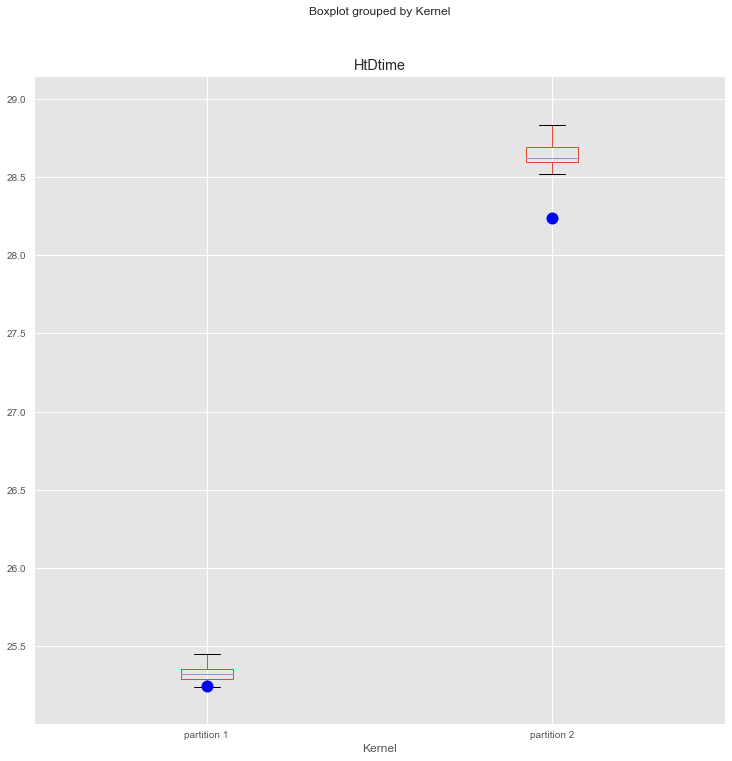

In [132]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']
mtestp1=np.mean(mt)
stderrmtestp1=np.std(mt)
varmtestp1=np.var(mt)
h = memtransfersync(6,42,6,3075200)

#mt['HtDtime'].plot(kind = 'box')
mt.boxplot(column='HtDtime',by='Kernel')
plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([2],[h[1]], marker = 'o',markersize=12, color='blue')


mt = mtest[mtest['Kernel']=='partition 2']
mtestp2=np.mean(mt)
stderrmtestp2=np.std(mt)
varmtestp2=np.var(mt)
print mtestp1['HtDtime']
print stderrmtestp1['HtDtime']
print varmtestp1['HtDtime']



print mtestp2['HtDtime']
print stderrmtestp2['HtDtime']
print varmtestp2['HtDtime']
h = memtransfersync(6,42,6,3075200)
print h
print memtransfersyncreturn(6,6,6,3075200)


(59.595957999543046, 66.735678872179179)
59.86579869
0.153172407735
0.0234617864914
67.42032422
0.179150228306
0.0320948043022
(59.595957999543046, 66.735678872179179)
(14.633469033622834, 14.633469033622834)


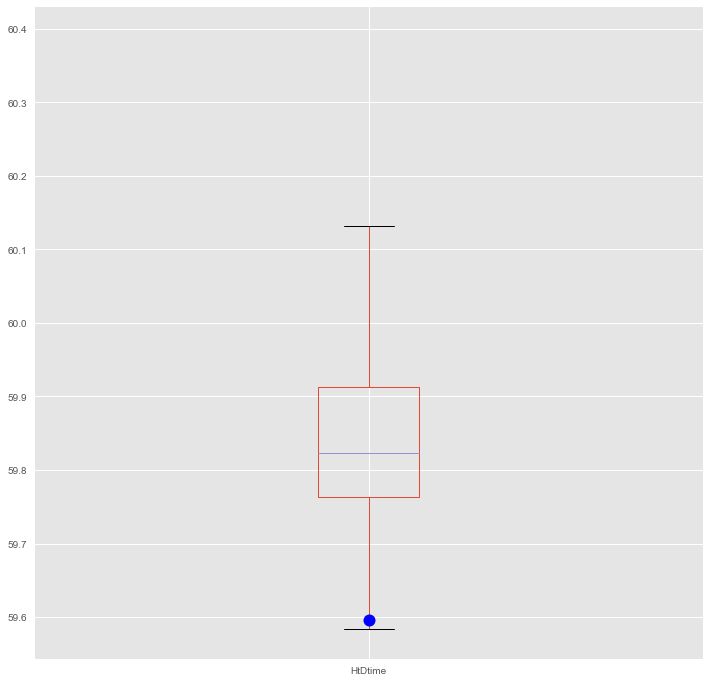

In [94]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest[mtest['Kernel']=='partition 1']
mtestp1=np.mean(mt)
stderrmtestp1=np.std(mt)
varmtestp1=np.var(mt)
h = memtransfersync(6,42,6,7372800)
print h
mt['HtDtime'].plot(kind = 'box')
plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

mt = mtest[mtest['Kernel']=='partition 2']
mtestp2=np.mean(mt)
stderrmtestp2=np.std(mt)
varmtestp2=np.var(mt)
print mtestp1['HtDtime']
print stderrmtestp1['HtDtime']
print varmtestp1['HtDtime']



print mtestp2['HtDtime']
print stderrmtestp2['HtDtime']
print varmtestp2['HtDtime']
h = memtransfersync(6,42,6,7372800)
print h
print memtransfersyncreturn(6,6,6,7372800)

(7.2133547333146106, 8.0309117528860465)
7.21585024
0.0367429785372
0.00135004647178
8.30394272
0.110464486515
0.0122024027811
(7.2133547333146106, 8.0309117528860465)
(1.7312424072490324, 1.7312424072490324)


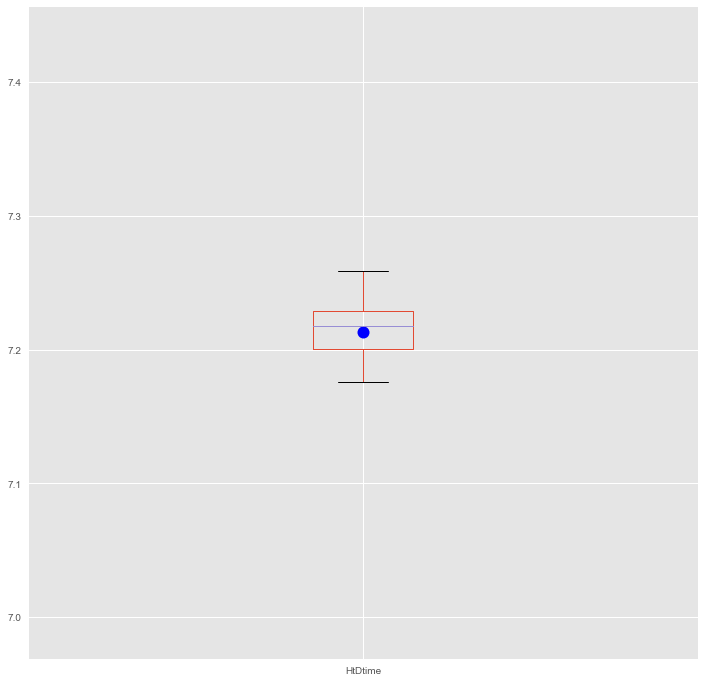

In [119]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest[mtest['Kernel']=='partition 1']
mtestp1=np.mean(mt)
stderrmtestp1=np.std(mt)
varmtestp1=np.var(mt)
h = memtransfersync(6,42,6,819200)
print h
mt['HtDtime'].plot(kind = 'box')
plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

mt = mtest[mtest['Kernel']=='partition 2']
mtestp2=np.mean(mt)
stderrmtestp2=np.std(mt)
varmtestp2=np.var(mt)
print mtestp1['HtDtime']
print stderrmtestp1['HtDtime']
print varmtestp1['HtDtime']



print mtestp2['HtDtime']
print stderrmtestp2['HtDtime']
print varmtestp2['HtDtime']
h = memtransfersync(6,42,6,819200)
print h
print memtransfersyncreturn(6,6,6,819200)

In [ ]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1024.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest[mtest['Kernel']=='partition 1']
mtestp1=np.mean(mt)
stderrmtestp1=np.std(mt)
varmtestp1=np.var(mt)
h = memtransfersync(6,42,6,819200)
print h
mt['HtDtime'].plot(kind = 'box')
plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

mt = mtest[mtest['Kernel']=='partition 2']
mtestp2=np.mean(mt)
stderrmtestp2=np.std(mt)
varmtestp2=np.var(mt)
print mtestp1['HtDtime']
print stderrmtestp1['HtDtime']
print varmtestp1['HtDtime']



print mtestp2['HtDtime']
print stderrmtestp2['HtDtime']
print varmtestp2['HtDtime']
h = memtransfersync(6,42,6,819200)
print h
print memtransfersyncreturn(6,6,6,819200)

At this point we're going to calculate a normalized overhead using our baseline
--------------------------------------------------------------------------

In [18]:
bl.columns = bl.columns.str.strip()
#bl.head()

In [19]:
# normalizeddf = dfsync.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# #normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)


In [20]:
# normalizeddf = dfsingle.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)

In [21]:
# normalizeddf = dfnosync.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)

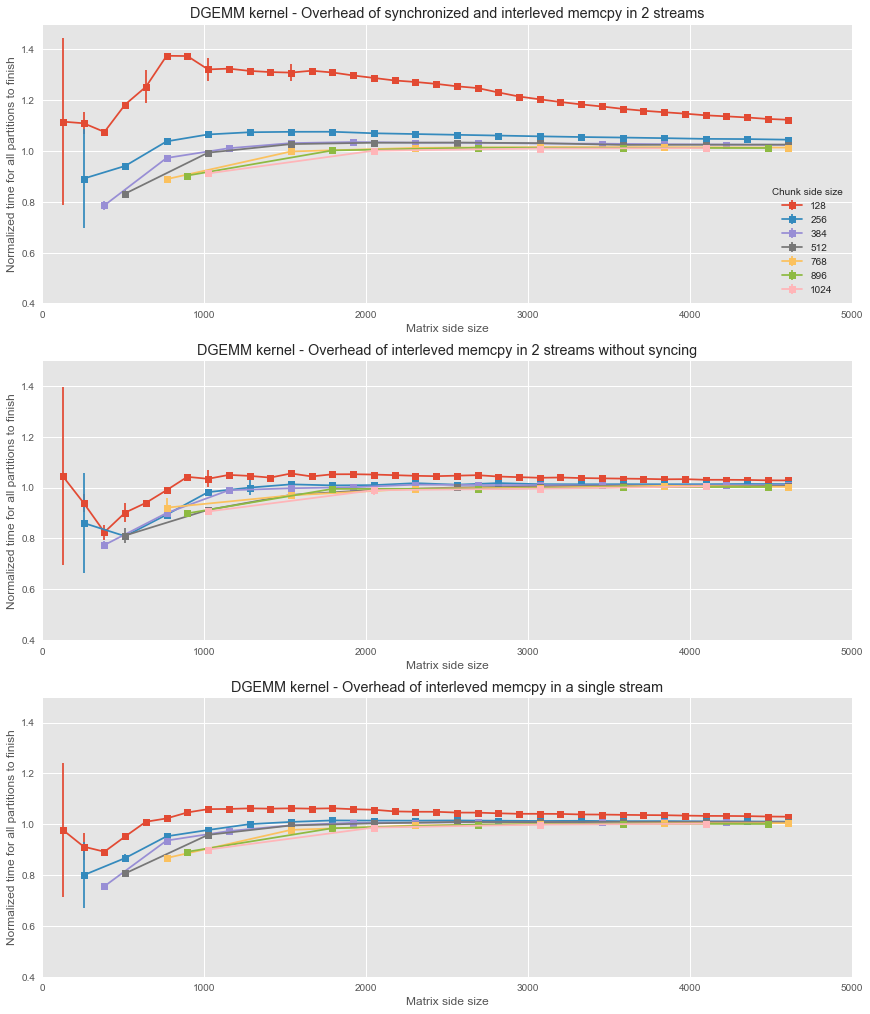

In [22]:
plt.figure(figsize=(12,14))
normalizeddf = dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

ANTT
----

In [23]:
bl = pd.read_csv('./data/kerneltestdata/baseline12sm.csv', sep = ',')
bl.columns = bl.columns.str.strip()


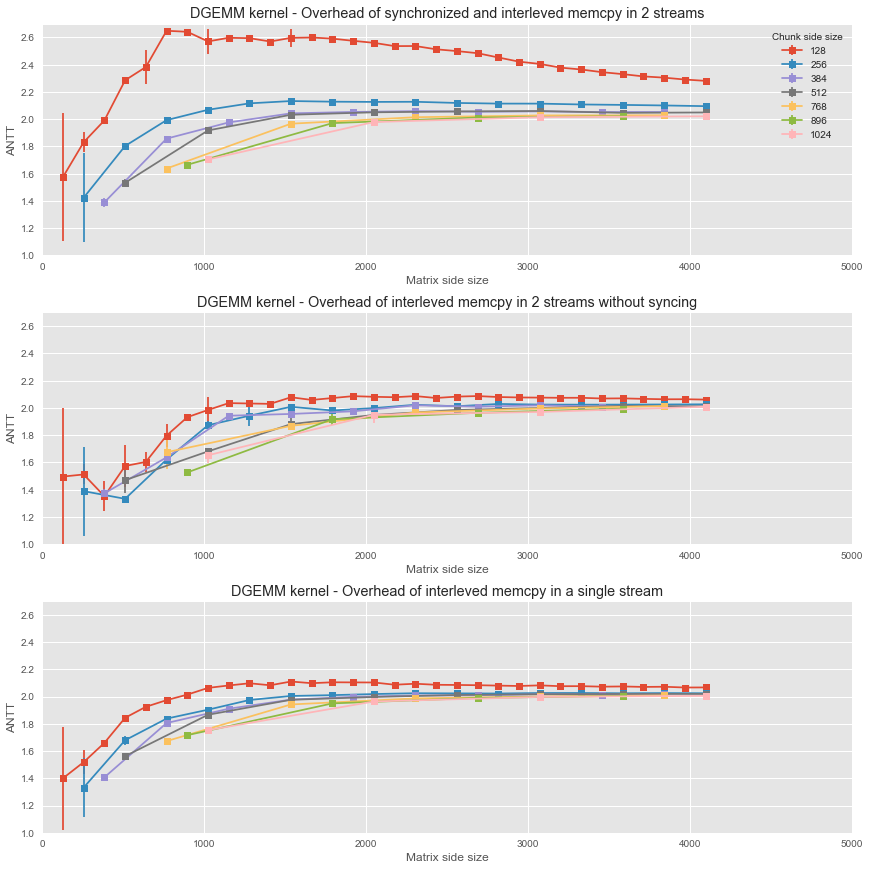

In [24]:
normalizeddf=dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')

plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(1,2.7)

plt.xlim(0,5000)

normalizeddf=dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(1,2.7)

plt.xlim(0,5000)

normalizeddf=dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(1,2.7)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)